# 📈 SARIMA Forecasting: AirPassengers Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import numpy as np

# Load dataset
df = pd.read_csv("/content/AirPassengers.csv")
df.columns = ['Month', 'Passengers']
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
ts = df['Passengers']
ts.head()


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [2]:
# Check for stationarity
adf_result = adfuller(ts)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])


ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values: {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}


In [3]:
# Fit SARIMA model
model = SARIMAX(ts, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = model.fit(disp=False)

# Forecast for next 24 months
forecast_steps = 24
forecast = sarima_result.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


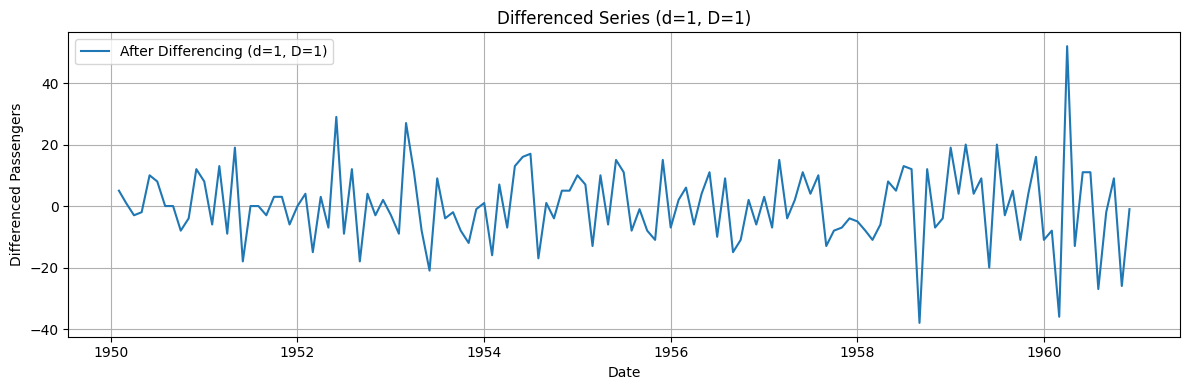

In [5]:
# Visualize the effect of differencing
ts_diff = ts.diff().dropna()
ts_seasonal_diff = ts.diff(12).dropna()
ts_both_diff = ts.diff().diff(12).dropna()

plt.figure(figsize=(12, 4))
plt.plot(ts_both_diff, label='After Differencing (d=1, D=1)')
plt.title('Differenced Series (d=1, D=1)')
plt.xlabel('Date')
plt.ylabel('Differenced Passengers')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# In-sample fitted values
fitted_values = sarima_result.fittedvalues
fitted_values = fitted_values.dropna()

# Align with actuals
actual_values = ts[fitted_values.index]

rmse = np.sqrt(mean_squared_error(actual_values, fitted_values))
mape = mean_absolute_percentage_error(actual_values, fitted_values) * 100

print(f"RMSE on training data: {rmse:.2f}")
print(f"MAPE on training data: {mape:.2f}%")

RMSE on training data: 15.56
MAPE on training data: 4.57%


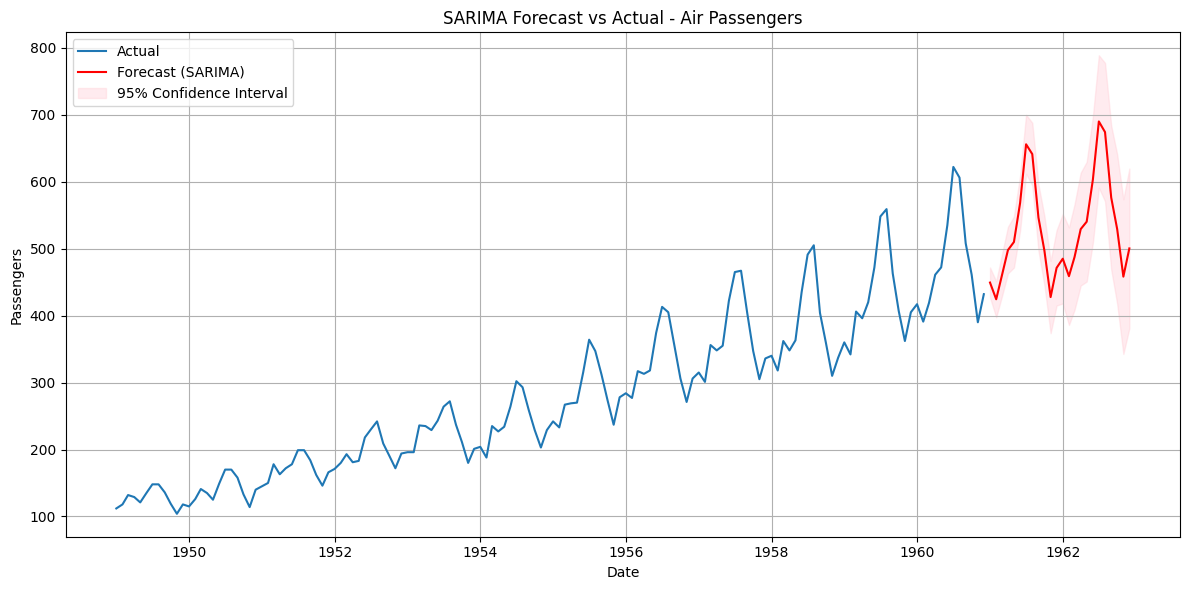

In [4]:
# Ensure all inputs are clean numpy arrays
forecast_index = pd.to_datetime(forecast_ci.index)
forecast_mean = forecast_mean.astype(float).to_numpy()
forecast_lower = forecast_ci.iloc[:, 0].astype(float).to_numpy()
forecast_upper = forecast_ci.iloc[:, 1].astype(float).to_numpy()

plt.figure(figsize=(12, 6))
plt.plot(ts.index, ts.values, label='Actual')
plt.plot(forecast_index, forecast_mean, label='Forecast (SARIMA)', color='red')
plt.fill_between(forecast_index, forecast_lower, forecast_upper,
                 color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title("SARIMA Forecast vs Actual - Air Passengers")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
